<a href="https://colab.research.google.com/github/TeomanEgeSelcuk/Stock-Options/blob/main/EDA_rolling_over.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Load

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# Load data from CSV file and parse date columns
df = pd.read_csv("drive/My Drive/Call Options Alert System/Options_data_calculated.csv", parse_dates=['QUOTE_DATE', 'EXPIRE_DATE'])



In [6]:
# Display the names of all columns in the DataFrame
column_names = df.columns
print(column_names)


Index(['QUOTE_DATE', 'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE',
       'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME',
       'C_LAST', 'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'STRIKE_DISTANCE',
       'STRIKE_DISTANCE_PCT', 'Percentage Change C_LAST',
       'Percentage Change UNDERLYING_LAST', 'Min C_LAST', 'Max C_LAST',
       'Min UNDERLYING_LAST', 'Max UNDERLYING_LAST', 'Percentage Gain C_LAST',
       'Percentage Gain UNDERLYING_LAST', 'Percentile_5', 'Percentile_10',
       'Percentile_25', 'Percentile_50'],
      dtype='object')


# All Call Options

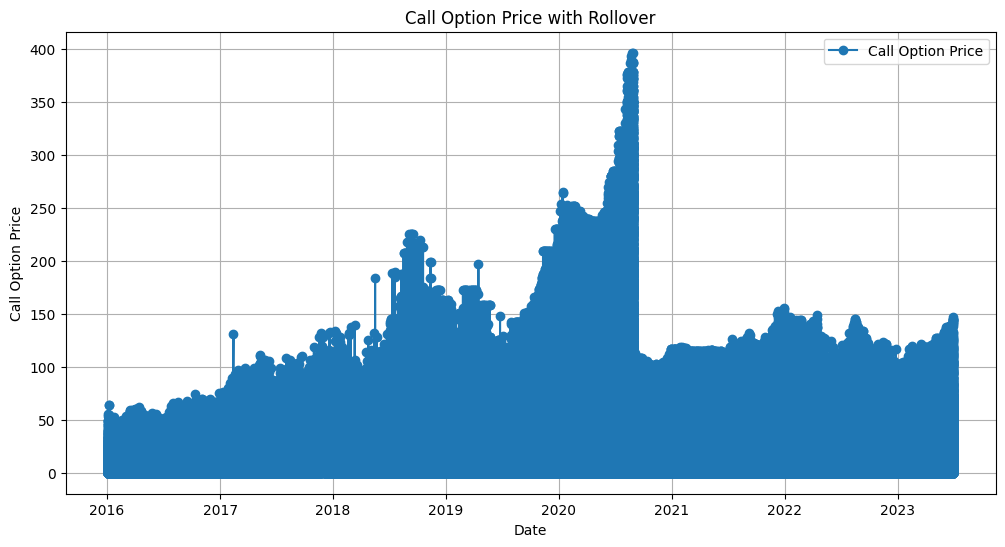

In [18]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df
# Replace this with the actual name of your DataFrame

# Sort the DataFrame by 'QUOTE_DATE' to ensure it's in chronological order
df.sort_values('QUOTE_DATE', inplace=True)

# Initialize variables for tracking the current contract and plotting data
current_contract = None
contract_history = []

# Iterate through the DataFrame to simulate contract rollovers
for _, row in df.iterrows():
    if current_contract is None:
        # If no current contract, set the initial contract
        current_contract = row
    elif row['EXPIRE_DATE'] <= current_contract['QUOTE_DATE']:
        # If the current contract has expired, roll over to the next row
        current_contract = row
    else:
        # Update the contract if needed (based on your rolling strategy)
        # For this example, we'll roll over to the next available contract
        current_contract = row

    # Append the current contract to the history
    contract_history.append(current_contract)

# Extract the relevant data for plotting
quote_dates = [contract['QUOTE_DATE'] for contract in contract_history]
call_prices = [contract['C_LAST'] for contract in contract_history]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(quote_dates, call_prices, marker='o', linestyle='-', label='Call Option Price')
plt.xlabel('Date')
plt.ylabel('Call Option Price')
plt.title('Call Option Price with Rollover')
plt.legend()
plt.grid(True)
plt.show()


# A rollover option with random strike price

# A random call option with price change with roll over

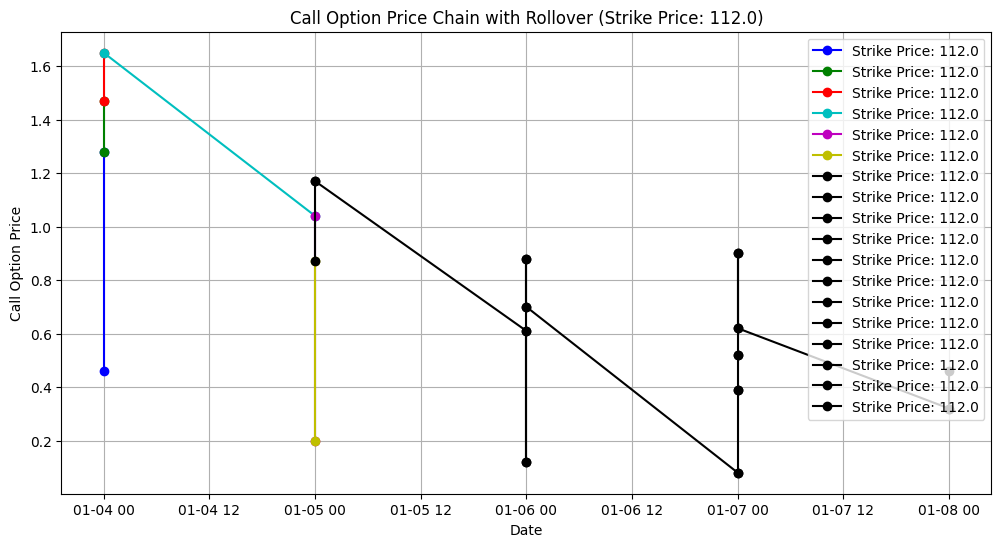

In [91]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

# Assuming you have a DataFrame called df
# Replace this with the actual name of your DataFrame

# Sort the DataFrame by 'QUOTE_DATE' to ensure it's in chronological order
df.sort_values('QUOTE_DATE', inplace=True)

# Select a random strike price from the available options
unique_strike_prices = df['STRIKE'].unique()
random_strike_price = random.choice(unique_strike_prices)

# Filter the DataFrame for the selected strike price
selected_strike_df = df[df['STRIKE'] == random_strike_price]

# Initialize variables for tracking the current contract and plotting data
current_contract = None
contract_history = []

# Initialize lists to store the dates and prices of the call options chain
chain_dates = []
chain_prices = []

# Initialize a list to store transition points
transition_points = []

# Define a list of unique colors for different contracts
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Iterate through the DataFrame to simulate the call options chain with rollover
for _, row in selected_strike_df.iterrows():
    if current_contract is None:
        # If no current contract, set the initial contract
        current_contract = row
    elif row['EXPIRE_DATE'] <= current_contract['QUOTE_DATE']:
        # The current contract has expired; roll over to the next available contract
        current_contract = row
        transition_points.append(row['QUOTE_DATE'])
    else:
        # Update the contract if needed (based on your rolling strategy)
        current_contract = row

    # Append the current contract to the history
    contract_history.append(current_contract)
    chain_dates.append(row['QUOTE_DATE'])
    chain_prices.append(row['C_LAST'])

# Create a plot for the call options chain with rollover
plt.figure(figsize=(12, 6))

for i, transition_point in enumerate(transition_points):
    if i < len(colors):
        color = colors[i]
    else:
        color = 'k'  # Use black for additional contracts

    plt.plot(chain_dates[i:i + 2], chain_prices[i:i + 2], marker='o', linestyle='-', color=color, label=f'Strike Price: {random_strike_price}')

plt.xlabel('Date')
plt.ylabel('Call Option Price')
plt.title(f'Call Option Price Chain with Rollover (Strike Price: {random_strike_price})')
plt.grid(True)
plt.legend()

# Create a table for contract details in the next section
table_data = []
for contract in contract_history:
    row = [contract['EXPIRE_DATE'], contract['STRIKE'], contract['DTE']]
    table_data.append(row)

table_headers = ['Expiry Date', 'Strike Price', 'DTE']
table = tabulate(table_data, headers=table_headers, tablefmt='grid')

# Display the graph
plt.show()




# A call random call option

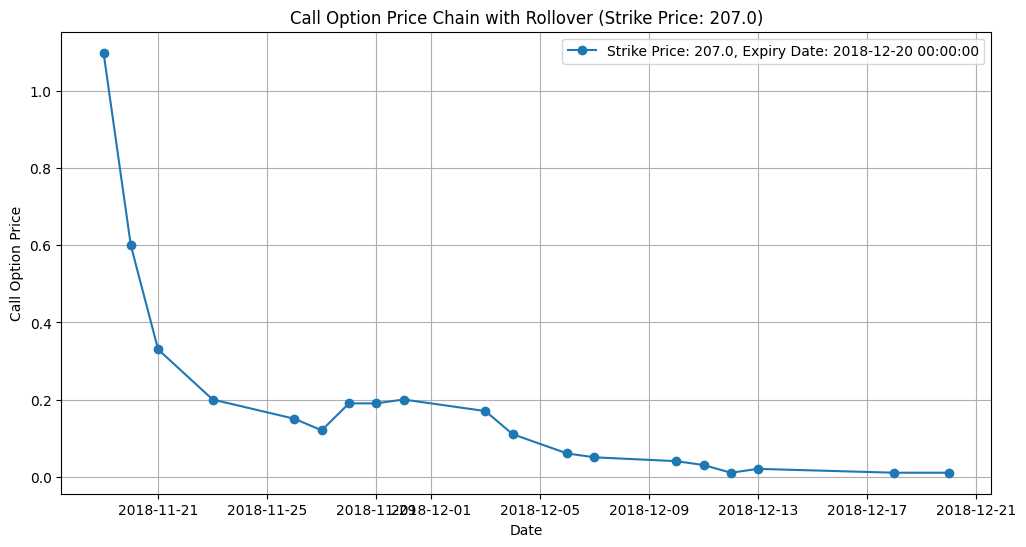

In [86]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df
# Replace this with the actual name of your DataFrame

# Sort the DataFrame by 'QUOTE_DATE' to ensure it's in chronological order
df.sort_values('QUOTE_DATE', inplace=True)

# Select a random strike price from the available options
unique_strike_prices = df['STRIKE'].unique()
random_strike_price = random.choice(unique_strike_prices)

# Filter the DataFrame for the selected strike price
selected_strike_df = df[df['STRIKE'] == random_strike_price]

# Initialize variables for tracking the current contract and plotting data
current_contract = None
contract_history = []

# Initialize lists to store the dates and prices of the call options chain
chain_dates = []
chain_prices = []

# Iterate through the DataFrame to simulate the call options chain with rollover
for _, row in selected_strike_df.iterrows():
    if current_contract is None:
        # If no current contract, set the initial contract
        current_contract = row
    elif row['EXPIRE_DATE'] <= current_contract['QUOTE_DATE']:
        # The current contract has expired; roll over to the next available contract
        current_contract = row
    else:
        # Update the contract if needed (based on your rolling strategy)
        current_contract = row

    # Append the current contract to the history
    contract_history.append(current_contract)
    chain_dates.append(row['QUOTE_DATE'])
    chain_prices.append(row['C_LAST'])

# Create a plot for the call options chain with rollover
plt.figure(figsize=(12, 6))
plt.plot(chain_dates, chain_prices, marker='o', linestyle='-', label=f'Strike Price: {random_strike_price}, Expiry Date: {current_contract["EXPIRE_DATE"]}')

plt.xlabel('Date')
plt.ylabel('Call Option Price')
plt.title(f'Call Option Price Chain with Rollover (Strike Price: {random_strike_price})')
plt.legend()
plt.grid(True)
plt.show()
